# About Data

    Input variables (based on physicochemical tests):

    1 -fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7 - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol
    
    Output variable (based on sensory data):

    12 - quality (score between 0 and 10)

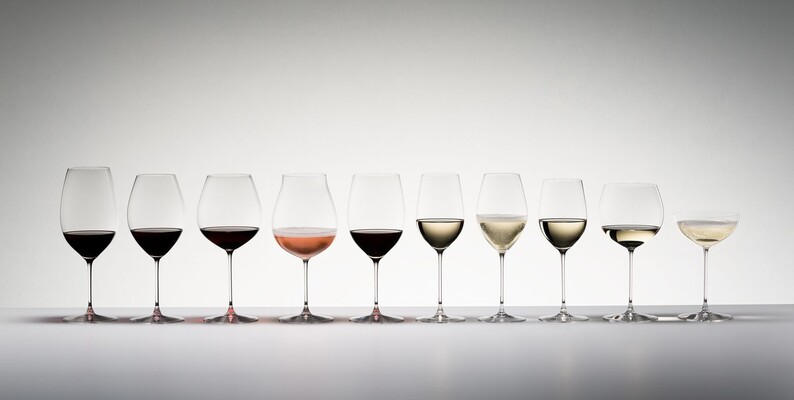

## 📚 Importing Libraries

In [76]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import warnings
import math

from rich import print
warnings.filterwarnings("ignore")

print("[green]Importing Libraries Successfully...[green]")

Importing Libraries Successfully...

# 🛠️ Data PreProcessing

## 📂 Load the data

In [77]:
df = pd.read_csv("/content/WineQT.csv",index_col="Id")


print("[green]Data loaded Successfully...[green]")

Data loaded Successfully...

## 📊 Display random columns

In [78]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
266,8.1,0.870,0.00,3.3,0.096,26.0,61.0,1.00025,3.60,0.72,9.8,4
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5
431,7.8,0.550,0.35,2.2,0.074,21.0,66.0,0.99740,3.25,0.56,9.2,5
753,8.3,0.650,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5
704,9.1,0.765,0.04,1.6,0.078,4.0,14.0,0.99800,3.29,0.54,9.7,4


## 🔢 Number of rows and columns

In [79]:
print("the number of rows:",df.shape[0])
print("the number of columns:",df.shape[1])

the number of rows: 1143

the number of columns: 12

## 🔍 Some statistical measures

In [80]:
df.describe().T.round(2).style.background_gradient(cmap="Greens")

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.310000,1.750000,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.530000,0.180000,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1143.000000,0.270000,0.200000,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.530000,1.360000,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.090000,0.050000,0.010000,0.070000,0.080000,0.090000,0.610000
free sulfur dioxide,1143.000000,15.620000,10.250000,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.910000,32.780000,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,1.000000,0.000000,0.990000,1.000000,1.000000,1.000000,1.000000
pH,1143.000000,3.310000,0.160000,2.740000,3.200000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.660000,0.170000,0.330000,0.550000,0.620000,0.730000,2.000000


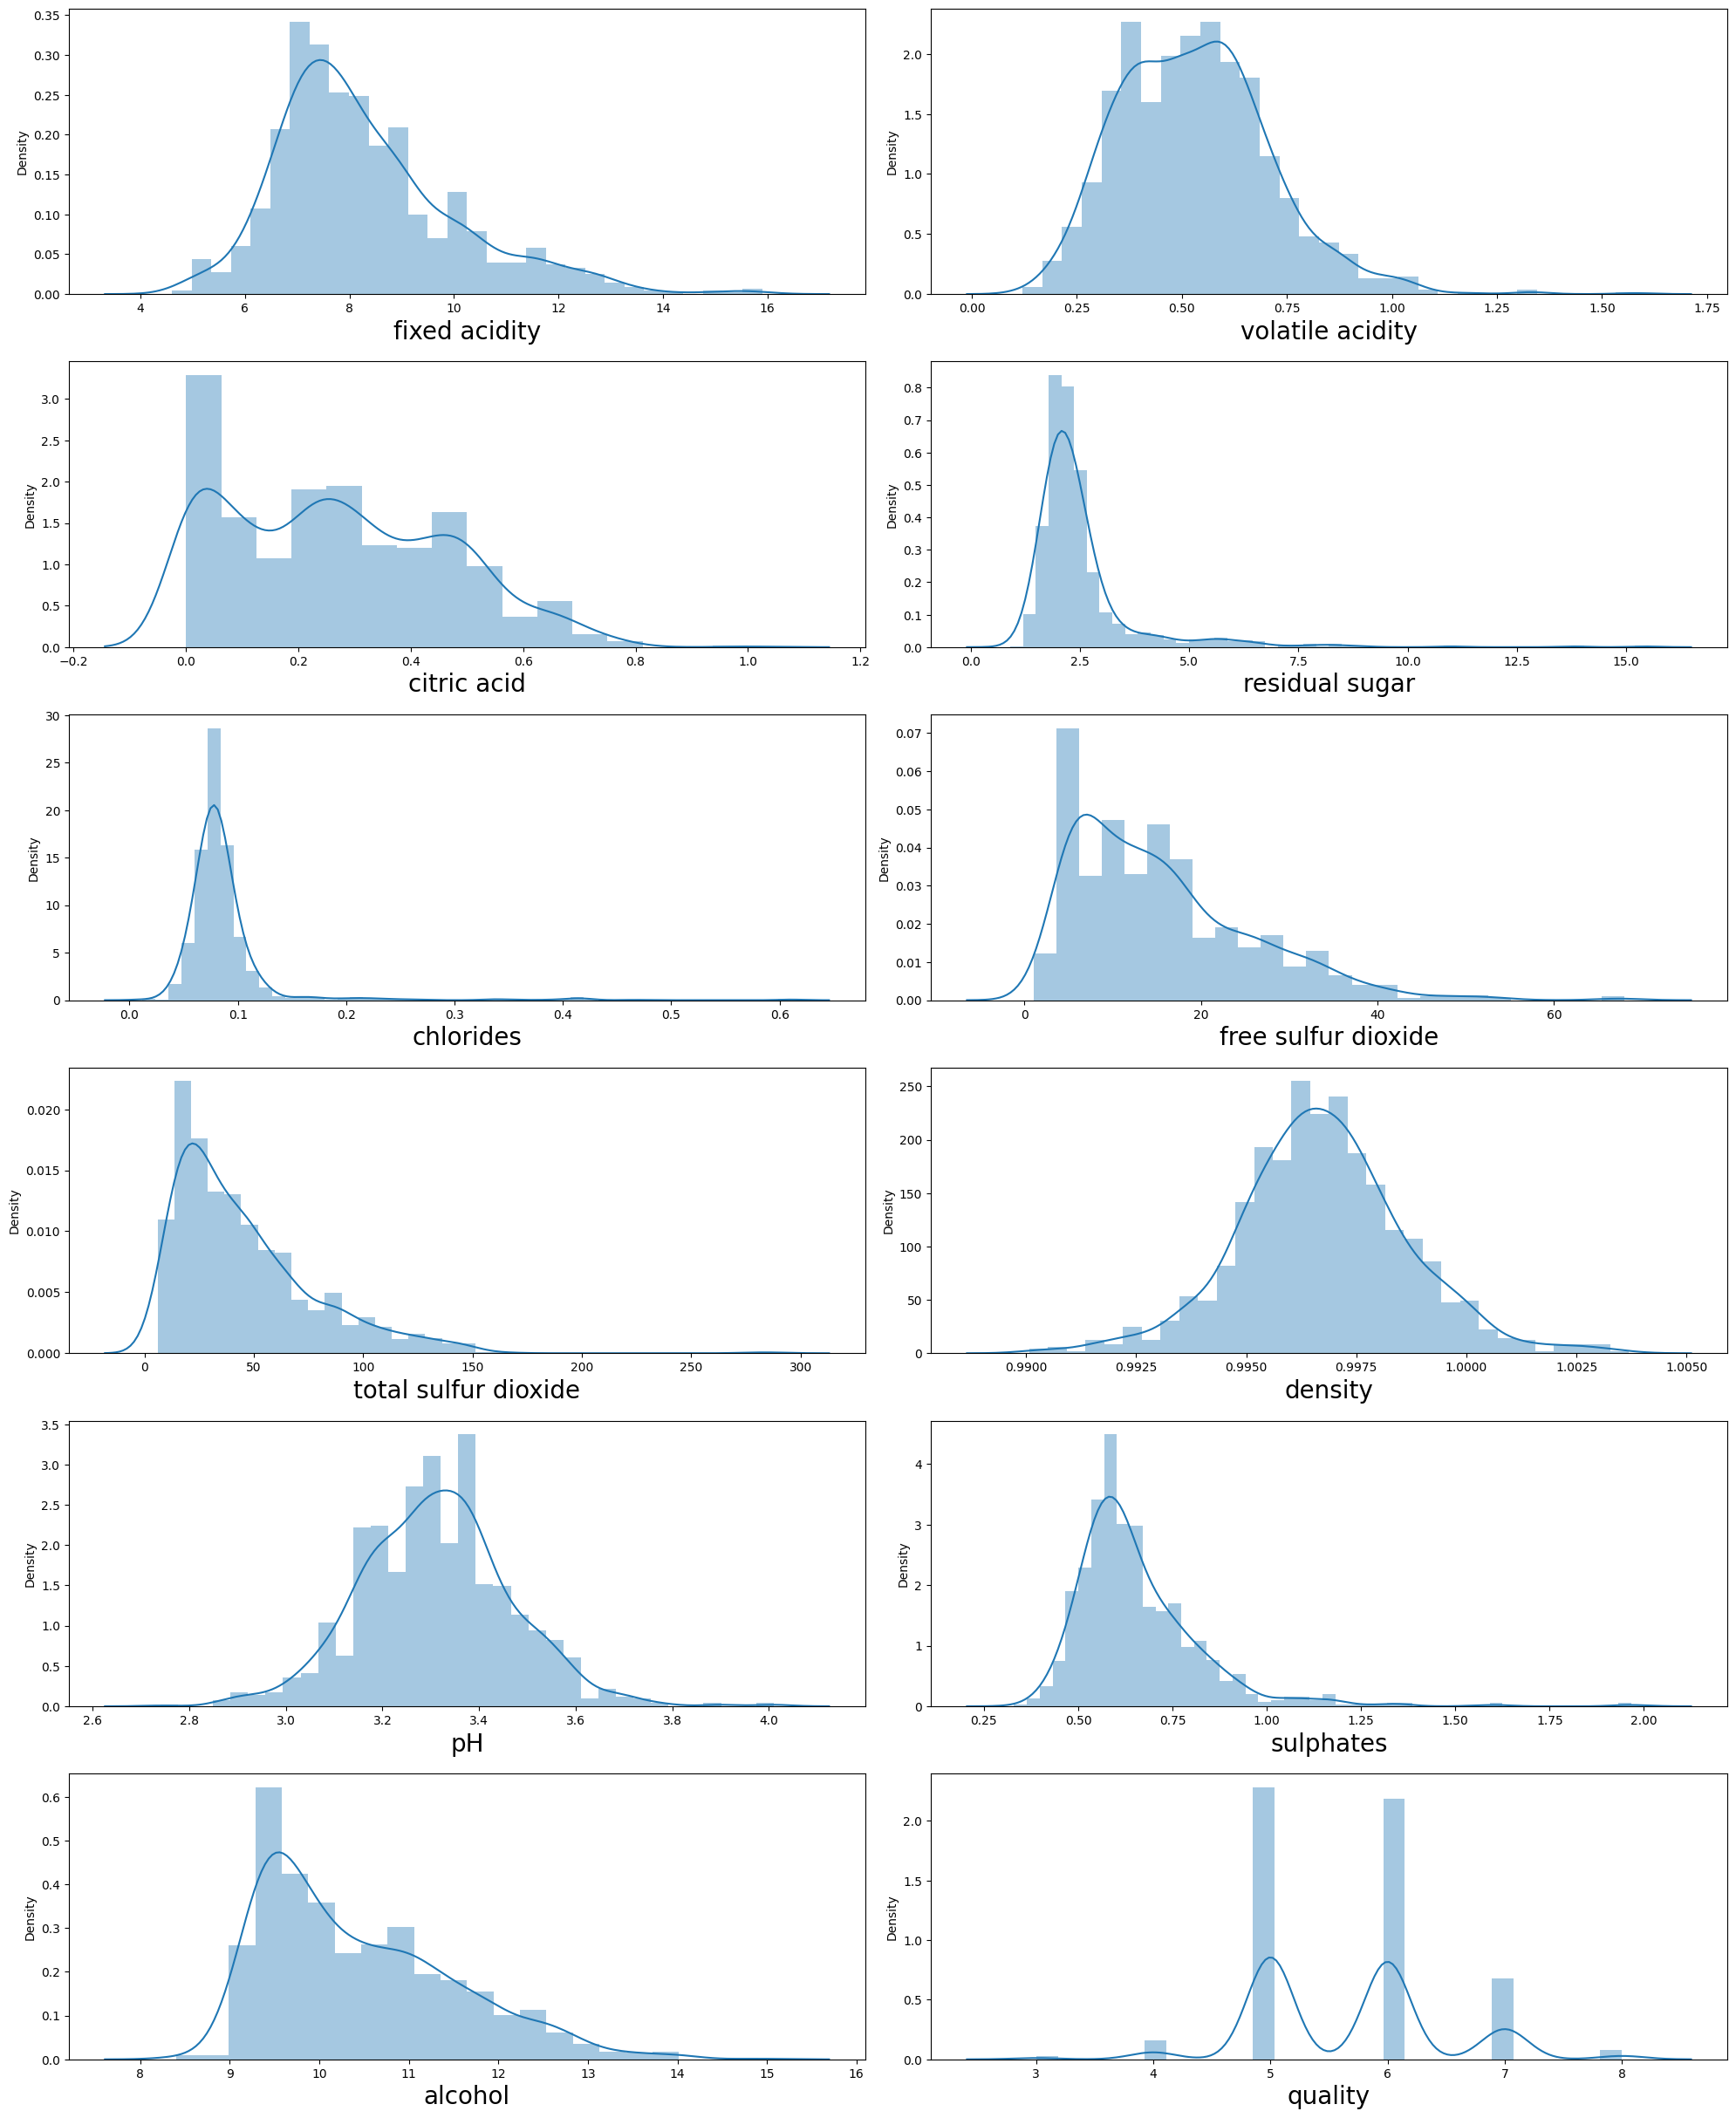

In [81]:
plt.figure(figsize=(20,40))
plotnum = 1
for columns in df:
    if plotnum <= len(df.columns) :
        ax=plt.subplot(10,2,plotnum)
        sns.distplot(df[columns])
        plt.xlabel(columns,fontsize=20)
    plotnum += 1
plt.tight_layout()
plt.show()

<Axes: >

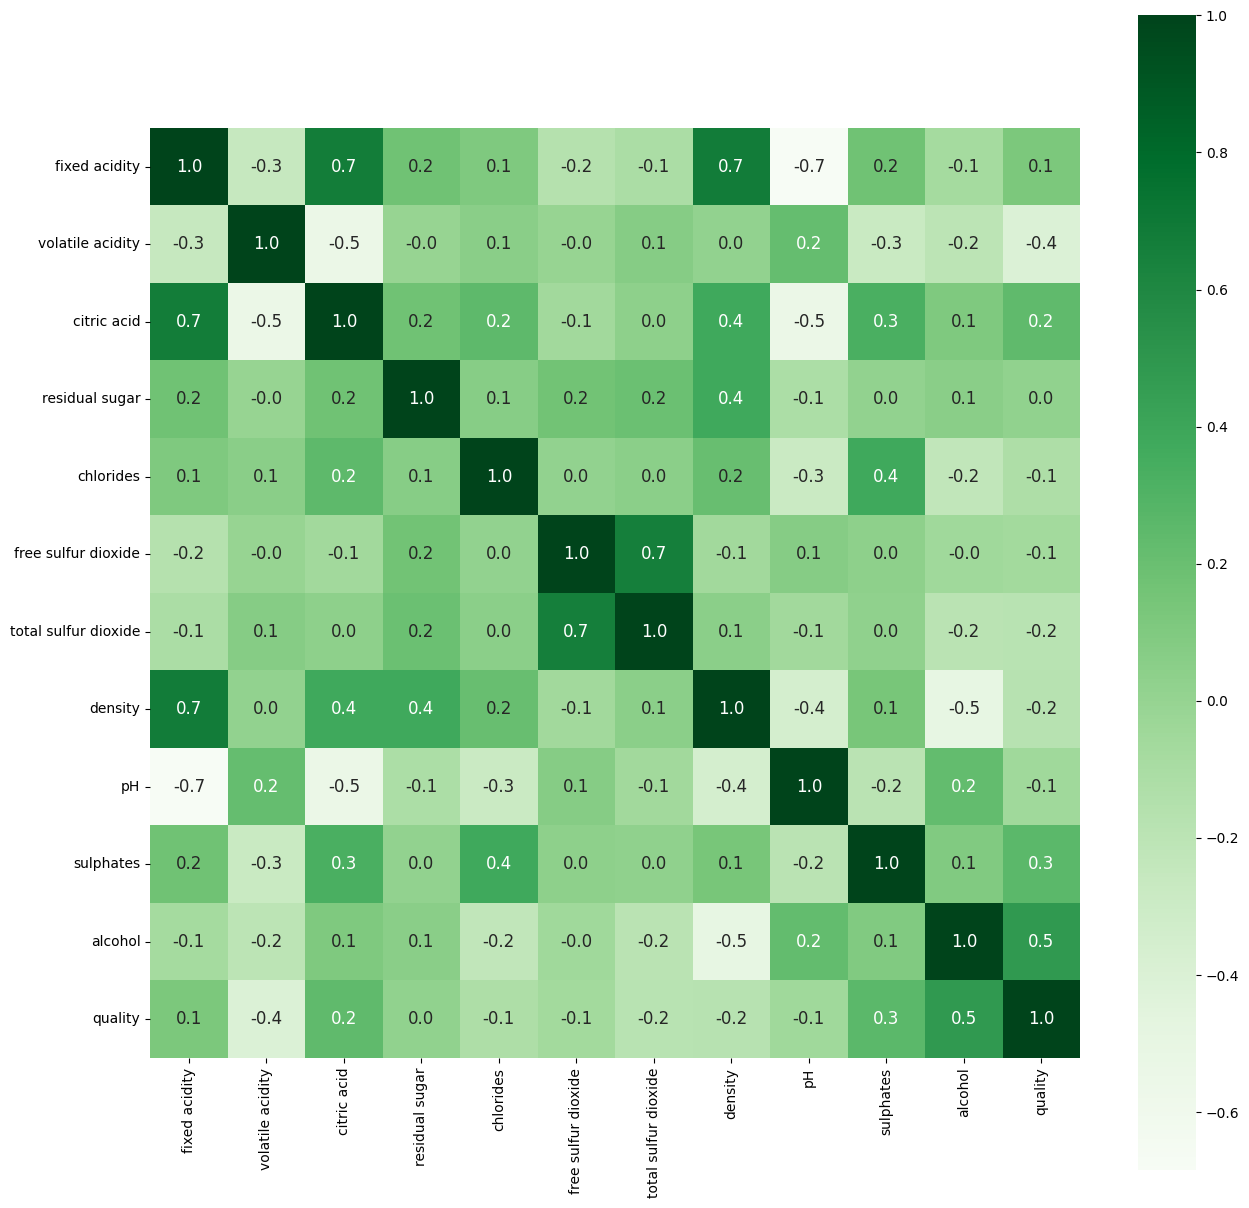

In [82]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,fmt='.1f',cbar=True,square=True,annot=True,annot_kws={'size':12},cmap='Greens')

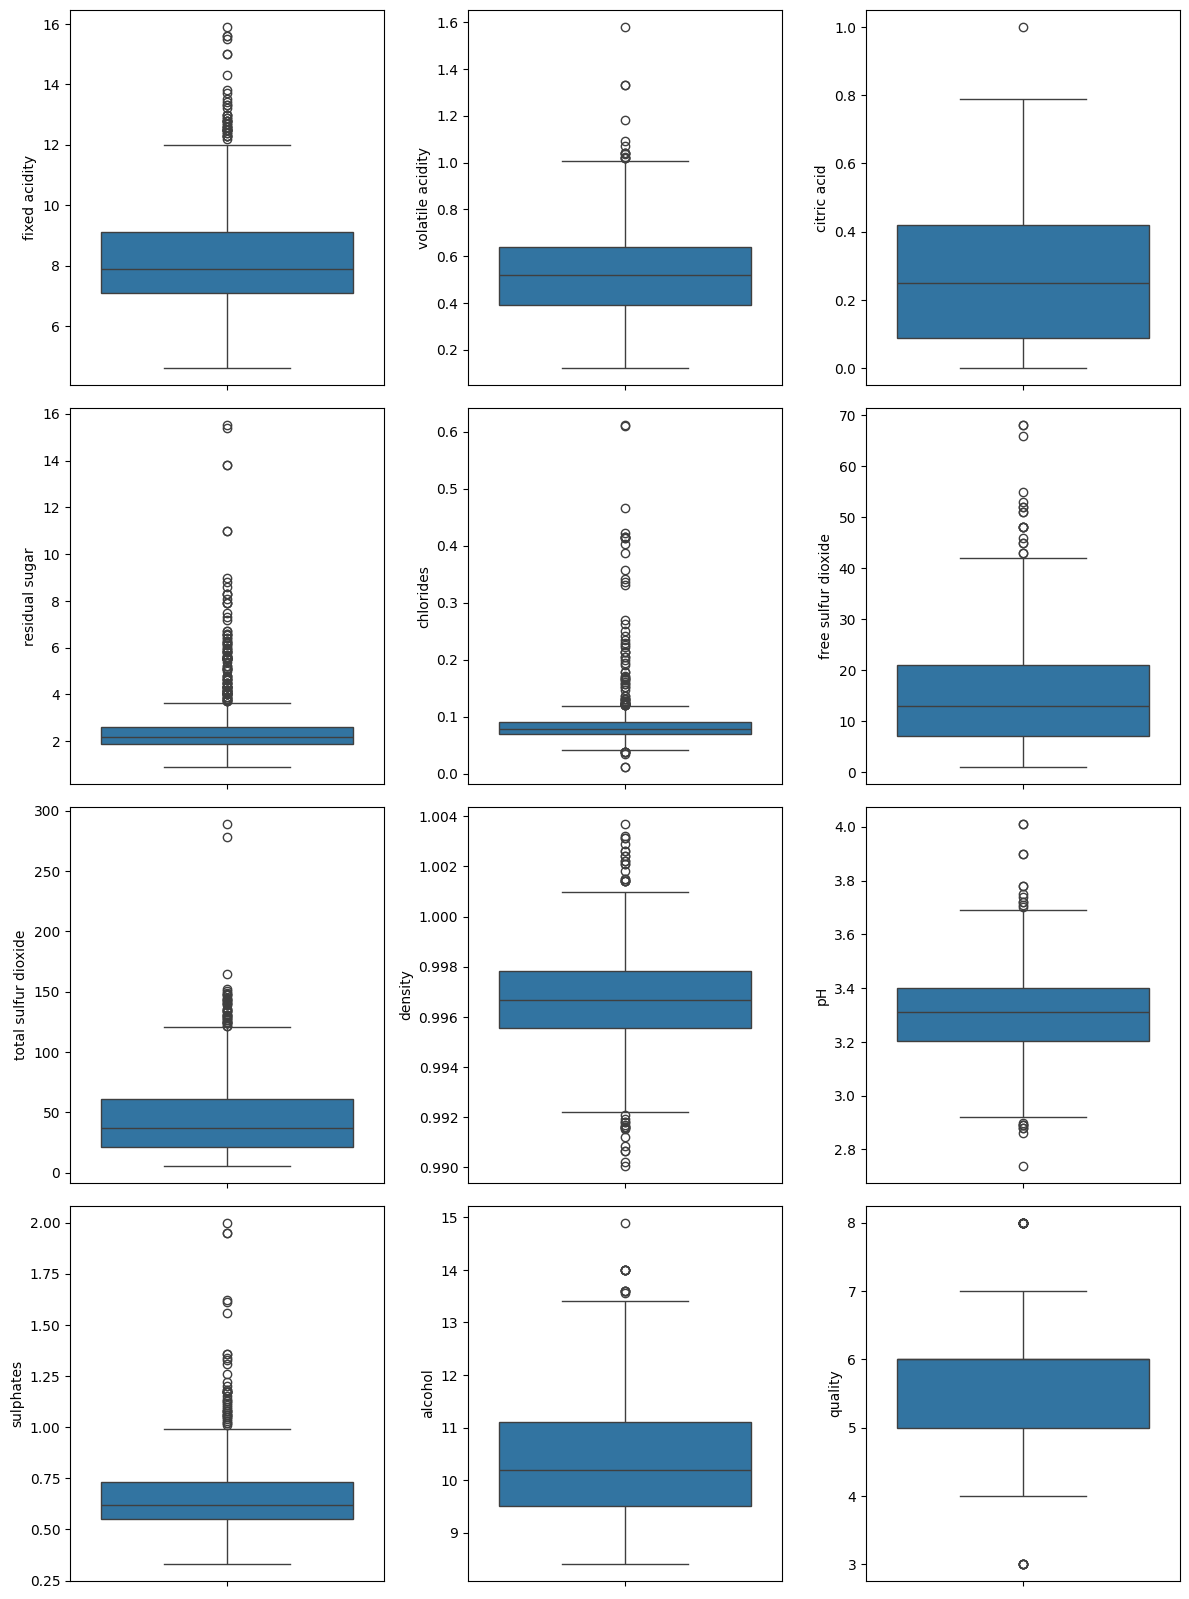

In [83]:
plt.figure(figsize=(12,20))
plotnum = 1
for columns in df:
    if plotnum <= len(df.columns) :
        ax=plt.subplot(5,3,plotnum)
        sns.boxplot(y=df[columns])

    plotnum += 1
plt.tight_layout()
plt.show()

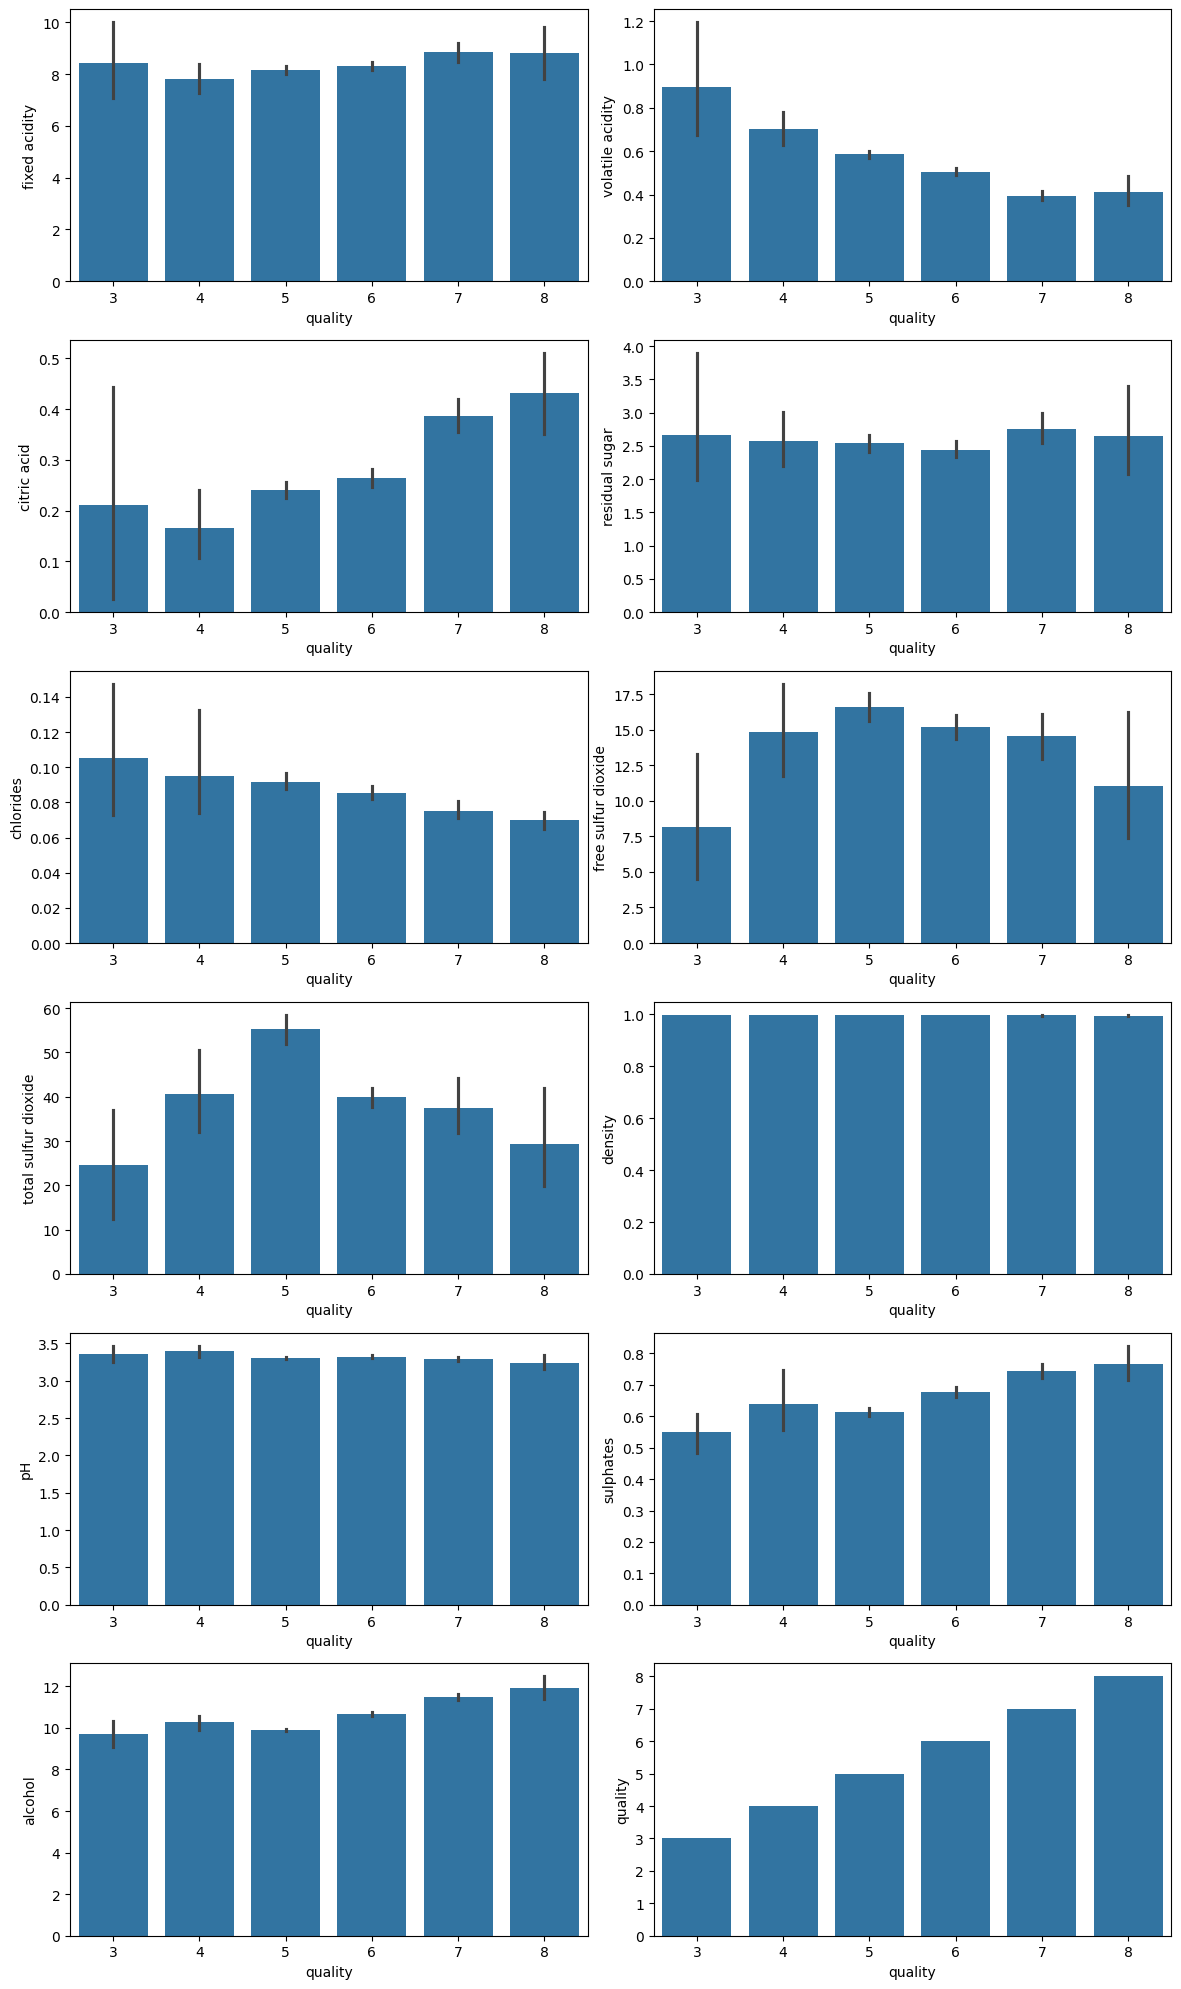

In [84]:
plt.figure(figsize=(12,20))
plotnum = 1
for columns in df:
    if plotnum <= len(df.columns) :
        ax=plt.subplot(6,2,plotnum)
        sns.barplot(x="quality",y=df[columns], data=df)

    plotnum += 1
plt.tight_layout()
plt.show()

In [85]:
print(f"\nValue counts for quality :")
print(df["quality"].value_counts().sort_values(ascending=False))

Value counts for quality :

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

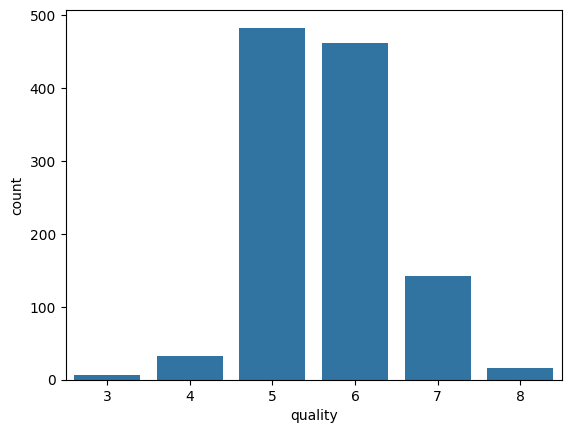

In [86]:
sns.countplot(x=df["quality"], data=df)

In [87]:
print(df.skew())

fixed acidity           1.044930
volatile acidity        0.681547
citric acid             0.371561
residual sugar          4.361096
chlorides               6.026360
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
density                 0.102395
pH                      0.221138
sulphates               2.497266
alcohol                 0.863313
quality                 0.286792
dtype: float64

In [88]:
print(df.kurt())

fixed acidity            1.384614
volatile acidity         1.375531
citric acid             -0.714686
residual sugar          27.675366
chlorides               47.078324
free sulfur dioxide      1.932170
total sulfur dioxide     5.098748
density                  0.888123
pH                       0.925791
sulphates               12.017377
alcohol                  0.221179
quality                  0.314664
dtype: float64

## 📄 information about Dataset

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


## 🧹 Null & NAN & Duplicated

In [90]:
print("The Number of Null in DataFrame is: ",df.isnull().sum().sum())
print("The Number of NAN in DataFrame is: ",df.isna().sum().sum())
print("The Number of duplicated in DataFrame is: ",df.duplicated().sum().sum())

The Number of Null in DataFrame is:  0

The Number of NAN in DataFrame is:  0

The Number of duplicated in DataFrame is:  125

In [91]:
df.drop_duplicates(inplace=True)

In [92]:
print("The Number of Null in DataFrame is: ",df.isnull().sum().sum())
print("The Number of NAN in DataFrame is: ",df.isna().sum().sum())
print("The Number of duplicated in DataFrame is: ",df.duplicated().sum().sum())

The Number of Null in DataFrame is:  0

The Number of NAN in DataFrame is:  0

The Number of duplicated in DataFrame is:  0

# ⚙️ Prepare Data for models

## ✂️ Separating the data

In [93]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

print("[green]Seperating Successfully...[green]")

Seperating Successfully...

## ⚖️ Data Sampling

In [94]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [95]:
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

print("Resampled class distribution:", Counter(Y_resampled))

Resampled class distribution:
Counter({
    np.int64(5): 433,
    np.int64(6): 433,
    np.int64(7): 433,
    np.int64(4): 433,
    np.int64(8): 433,
    np.int64(3): 433
})

## 📐 Standarized Data

In [96]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [97]:
X_resampled.std()

np.float64(1.090002553146533)

## 🔀 Splitting the data into train and test

In [98]:
from sklearn.model_selection import train_test_split



X_train,X_test,Y_train,Y_test = train_test_split(X_resampled, Y_resampled,test_size=0.2, random_state=11)



In [99]:
print("X shape:", X.shape)
print("y shape:", Y.shape)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("X_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X shape:
(1018, 11)

y shape:
(1018,)

X_train shape:
(2078, 11)

X_test shape:
(520, 11)

X_train shape:
(2078,)

Y_test shape:
(520,)

# 🤖 Train Model

In [100]:
results=[]
def training_models(model_name, model):
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on training and test data
    X_train_pred = model.predict(X_train)
    X_test_pred = model.predict(X_test)

    # Accuracy scores
    accuracy_train = accuracy_score(Y_train, X_train_pred)
    accuracy_test = accuracy_score(Y_test, X_test_pred)

    # Classification report
    report = classification_report(Y_test, X_test_pred)

    # Print results with formatting
    print(f"[bold cyan]The Accuracy Score of training by {model_name} (Train):[/bold cyan] {accuracy_train:.2f}")
    print(f"[bold magenta]The Accuracy Score of training by {model_name} (Test):[/bold magenta] {accuracy_test:.2f}\n")

    print("[bold yellow]Classification Report:[/bold yellow]")
    print(report)

    # Completion message
    print("[bold green]Training Complete...[/bold green]")



    # Save results
    results.append({
        "Model": model_name,
        "Test Accuracy": accuracy_test
    })

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.naive_bayes import GaussianNB

In [102]:
log = LogisticRegression()

training_models("Logistic Regression",log)

The Accuracy Score of training by Logistic Regression (Train): 0.64

The Accuracy Score of training by Logistic Regression (Test): 0.63

Classification Report:

precision    recall  f1-score   support

           3       0.86      0.96      0.91        85
           4       0.65      0.56      0.60        94
           5       0.52      0.58      0.55        79
           6       0.46      0.39      0.43        84
           7       0.54      0.51      0.52        89
           8       0.69      0.76      0.72        89

    accuracy                           0.63       520
   macro avg       0.62      0.63      0.62       520
weighted avg       0.62      0.63      0.62       520

Training Complete...

In [103]:
dest=DecisionTreeClassifier()
training_models("Decision Tree Classifier",dest)

The Accuracy Score of training by Decision Tree Classifier (Train): 1.00

The Accuracy Score of training by Decision Tree Classifier (Test): 0.77

Classification Report:

precision    recall  f1-score   support

           3       0.98      0.96      0.97        85
           4       0.81      0.84      0.82        94
           5       0.54      0.56      0.55        79
           6       0.49      0.43      0.46        84
           7       0.79      0.85      0.82        89
           8       0.94      0.91      0.93        89

    accuracy                           0.77       520
   macro avg       0.76      0.76      0.76       520
weighted avg       0.76      0.77      0.76       520

Training Complete...

In [104]:
randf = RandomForestClassifier()
training_models("Random Forest Classifier",randf)

The Accuracy Score of training by Random Forest Classifier (Train): 1.00

The Accuracy Score of training by Random Forest Classifier (Test): 0.84

Classification Report:

precision    recall  f1-score   support

           3       0.99      1.00      0.99        85
           4       0.89      0.94      0.91        94
           5       0.72      0.65      0.68        79
           6       0.62      0.54      0.57        84
           7       0.84      0.92      0.88        89
           8       0.94      0.98      0.96        89

    accuracy                           0.84       520
   macro avg       0.83      0.84      0.83       520
weighted avg       0.83      0.84      0.84       520

Training Complete...

In [105]:
from sklearn.svm import SVC

SVC = SVC()
training_models("SVC",SVC)

The Accuracy Score of training by SVC (Train): 0.78

The Accuracy Score of training by SVC (Test): 0.72

Classification Report:

precision    recall  f1-score   support

           3       0.87      1.00      0.93        85
           4       0.80      0.77      0.78        94
           5       0.55      0.56      0.55        79
           6       0.46      0.39      0.42        84
           7       0.73      0.69      0.71        89
           8       0.81      0.89      0.85        89

    accuracy                           0.72       520
   macro avg       0.70      0.71      0.71       520
weighted avg       0.71      0.72      0.71       520

Training Complete...

In [106]:
guss = GaussianNB()
training_models("GaussianNB",guss)

The Accuracy Score of training by GaussianNB (Train): 0.55

The Accuracy Score of training by GaussianNB (Test): 0.53

Classification Report:

precision    recall  f1-score   support

           3       0.58      1.00      0.74        85
           4       0.50      0.37      0.43        94
           5       0.51      0.38      0.43        79
           6       0.36      0.24      0.29        84
           7       0.48      0.34      0.40        89
           8       0.59      0.85      0.70        89

    accuracy                           0.53       520
   macro avg       0.51      0.53      0.50       520
weighted avg       0.51      0.53      0.50       520

Training Complete...

In [107]:
results_df = pd.DataFrame(results)
print("[bold green]Model Comparison Table:[/bold green]")
print(results_df.sort_values(by="Test Accuracy", ascending = False))

Model Comparison Table:

Model  Test Accuracy
2  Random Forest Classifier       0.842308
1  Decision Tree Classifier       0.765385
3                       SVC       0.719231
0       Logistic Regression       0.628846
4                GaussianNB       0.530769

# 🎉 Thank You

# Made by : Ali Osama ✍️

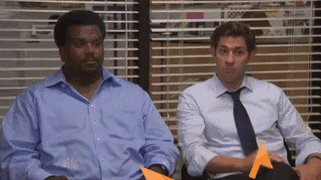